In [ ]:
!pip install autoviz

In [ ]:
#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


Shape of your Data Set loaded: (205, 26)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  7
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  6
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    26 Predictors classified...
        This does not include the Target column(s)
        6 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 15


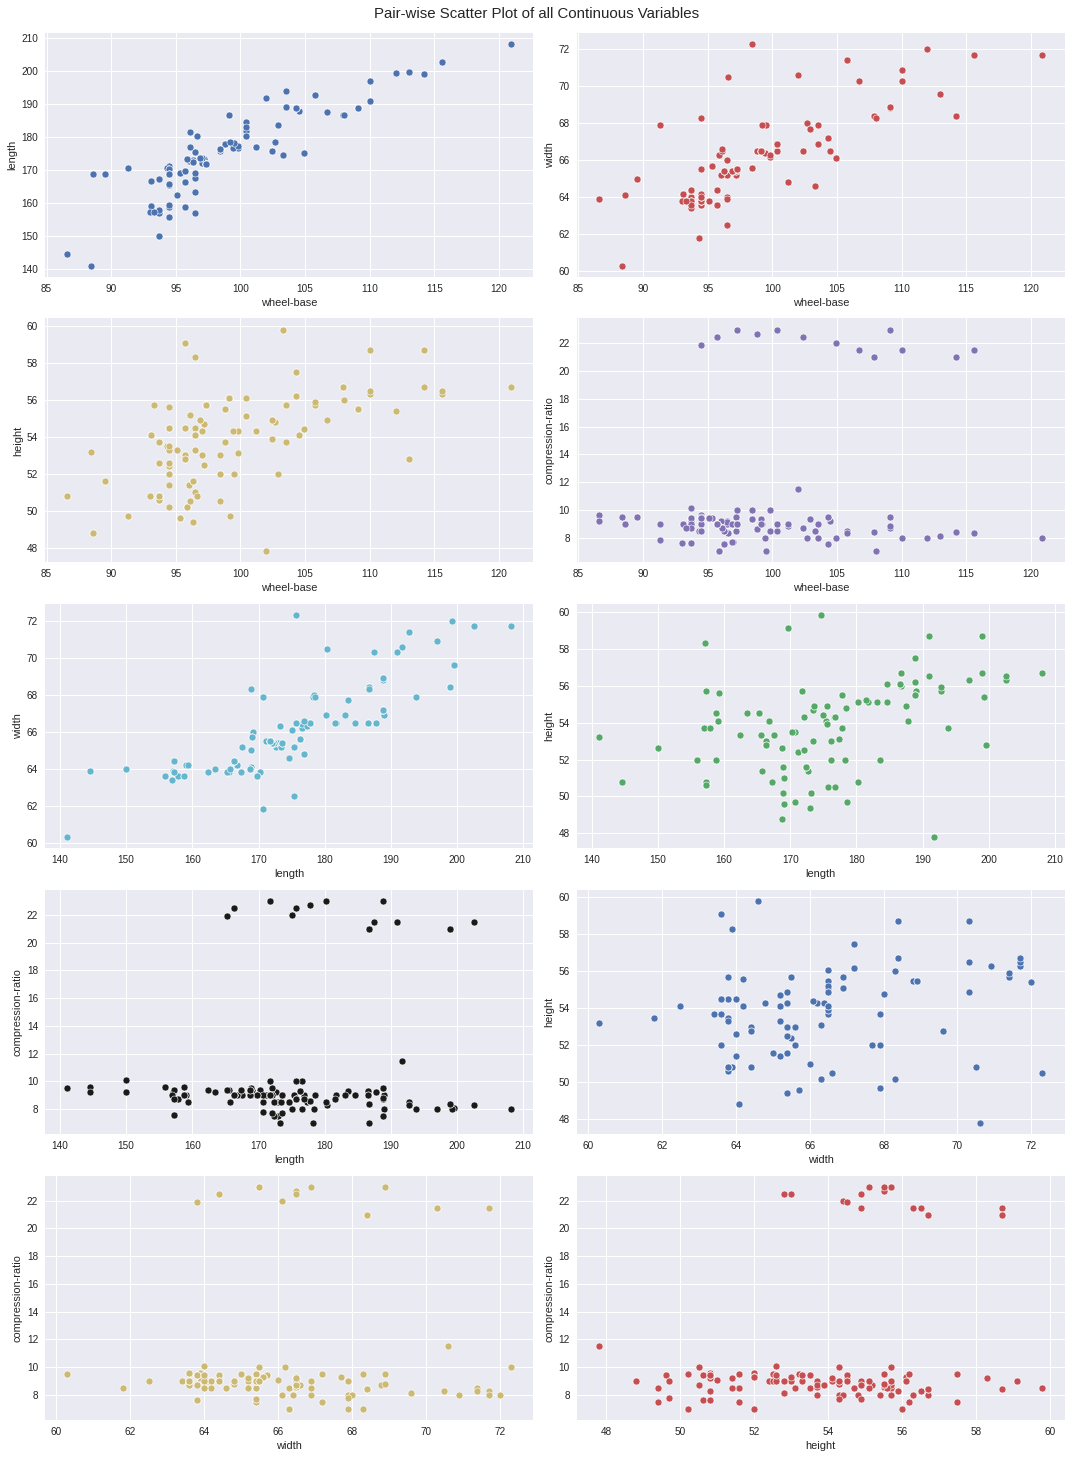

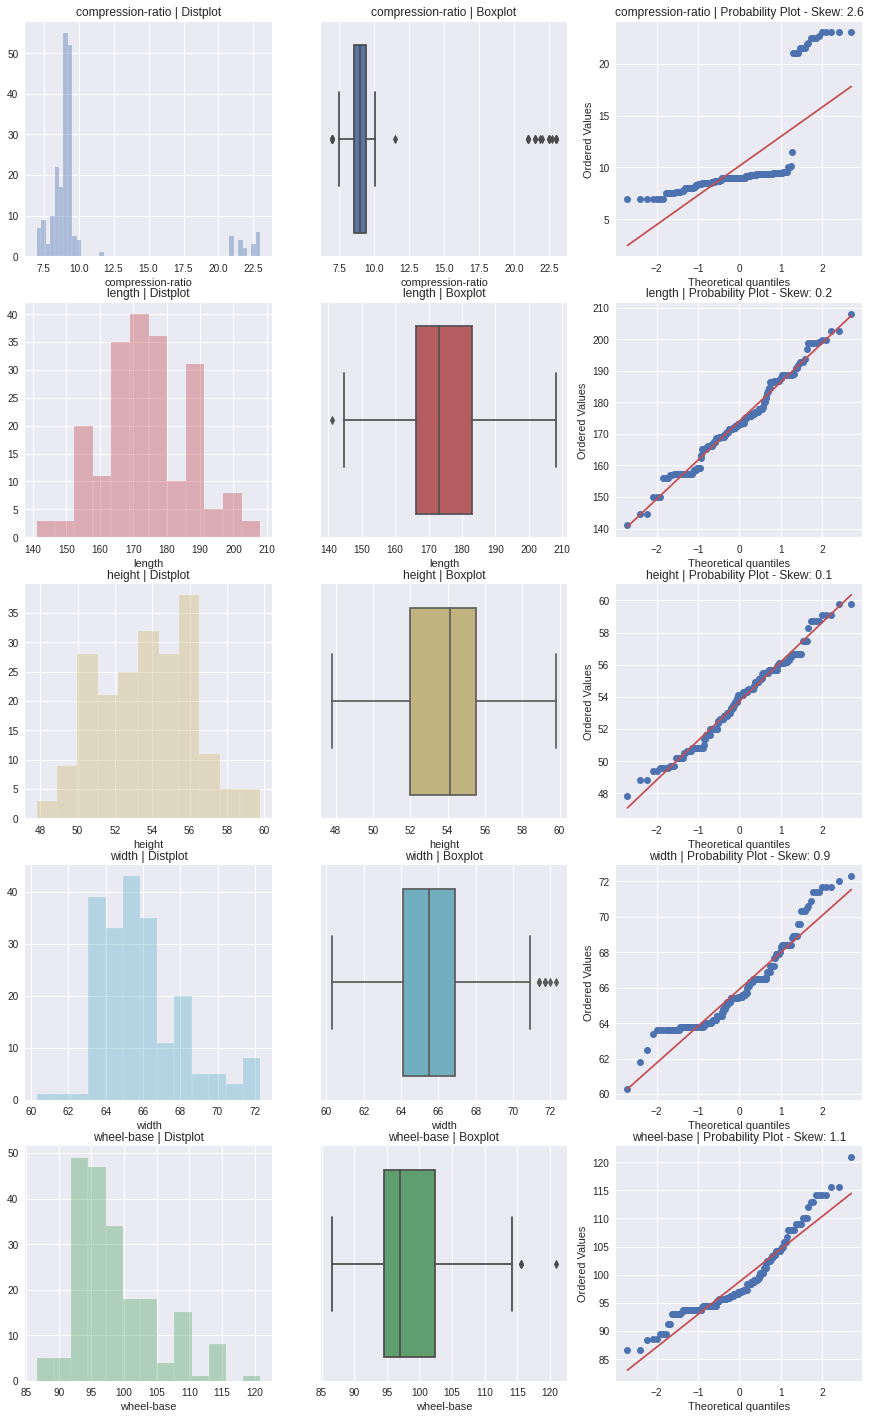

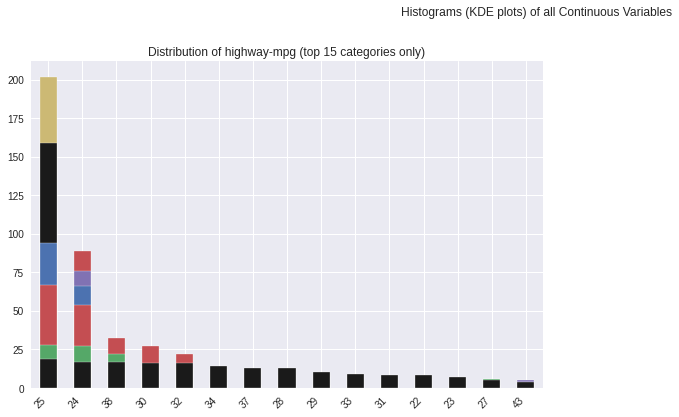

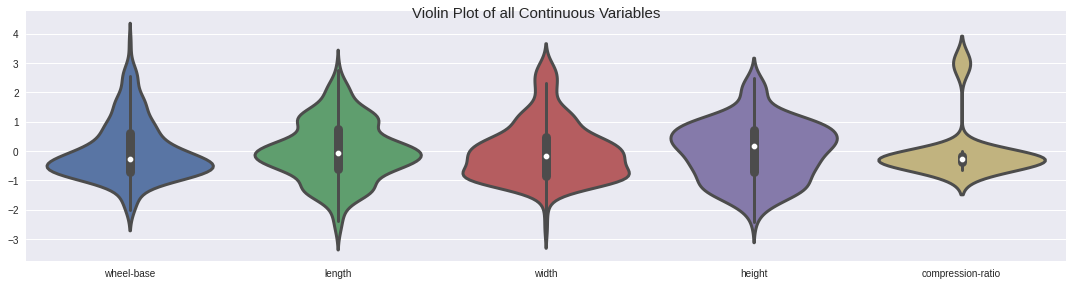

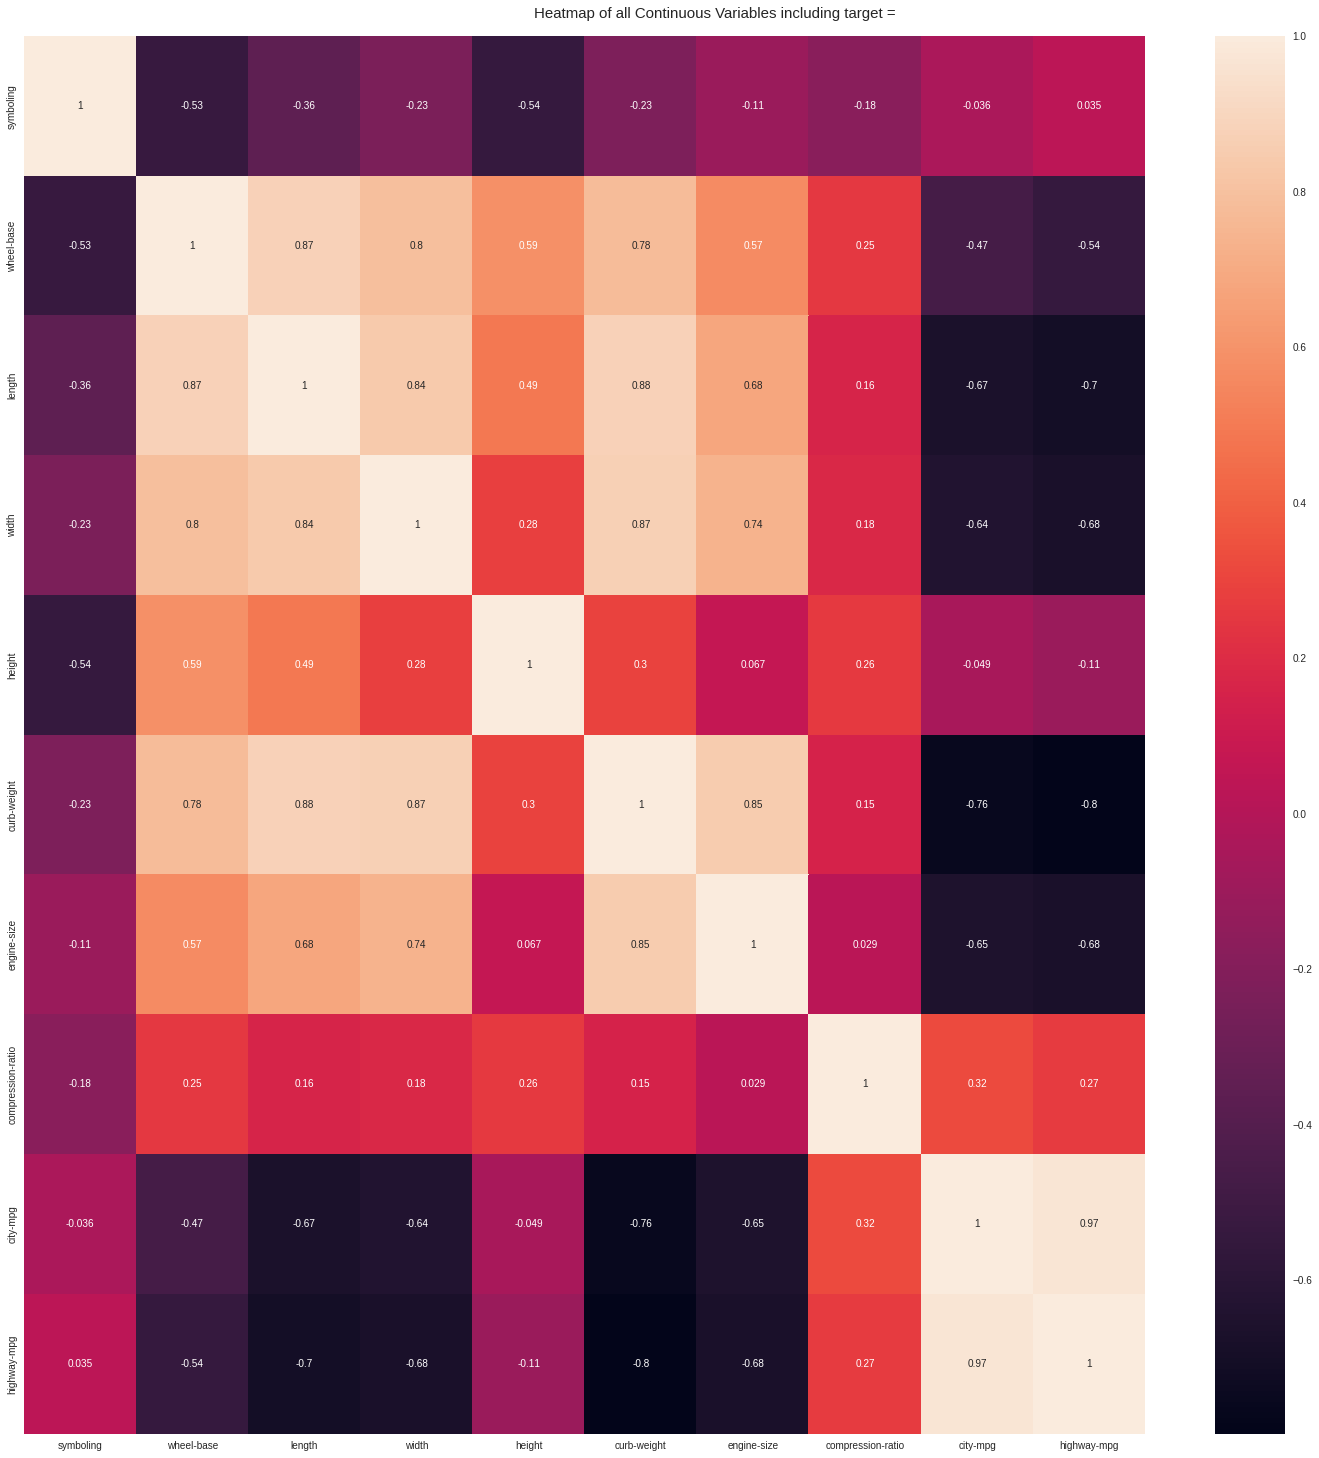

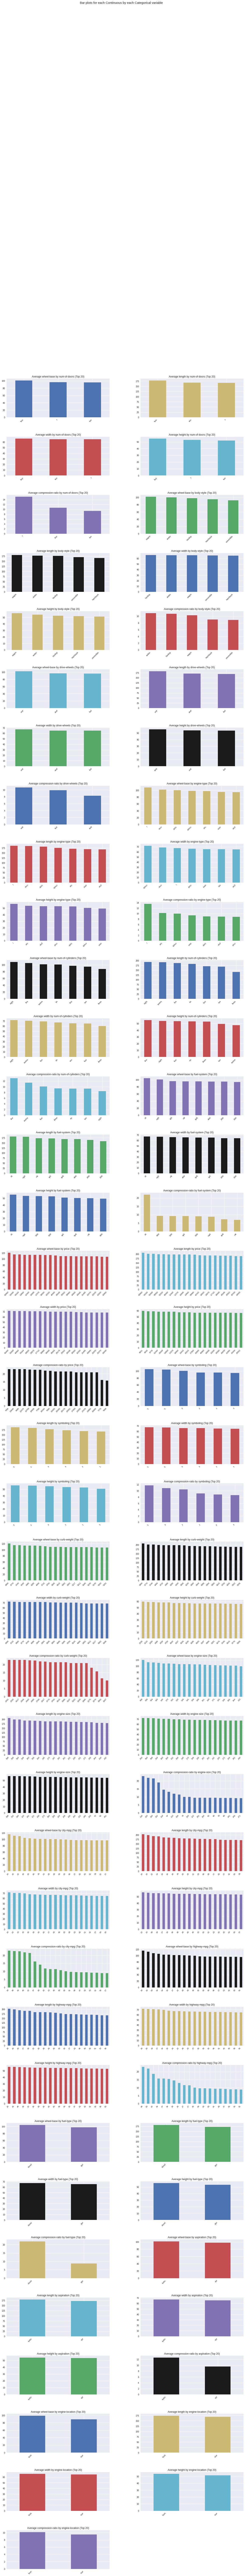

Time to run AutoViz (in seconds) = 27.284

 ###################### VISUALIZATION Completed ########################


In [ ]:
df = AV.AutoViz('/content/car_design.csv')

In [ ]:
df = AV.AutoViz('/content/advertising1.csv', depVar='Sales')

Shape of your Data Set loaded: (1000, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    10 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables
Could not find given target var in data set. Please check input
Not able to read or load file. Please check your inputs and try again...


In [ ]:
!pip install panel-highcharts

     |████████████████████████████████| 54 kB 1.6 MB/s 


In [ ]:
import panel_highcharts as ph
import panel as pn
pn.extension('highchart')

In [ ]:
#Define the configuration and the data to be used in chart 
configuration = {
    "title": {"text": "Line Chart Pane"},
    "series": [
        {
            "name": "Sales",
            "data": [100, 250, 150, 400, 500],
        }
    ]
}
ph.HighChart(object=configuration, sizing_mode="stretch_width")

HighChart(dict, sizing_mode='stretch_width')

In [ ]:
chart = ph.HighChart(object=configuration, sizing_mode= "stretch_width")
settings = pn.WidgetBox(
    pn.Param(
        chart,
        parameters=["height", "width", "sizing_mode", "margin", "object", "event", ],
                widgets={"object": pn.widgets.LiteralInput, "event": pn.widgets.StaticText},
        sizing_mode="fixed", show_name=False, width=250,
    )
)
pn.Row(settings, chart, sizing_mode="stretch_both")

Row(sizing_mode='stretch_both')
    [0] WidgetBox
        [0] Param(HighChart, parameters=['height', 'width', ...], show_name=False, sizing_mode='fixed', widgets={'object': <class 'panel.w...}, width=250)
    [1] HighChart(dict, sizing_mode='stretch_width')

In [ ]:
pn.extension('highstock')
import requests, json
#Downloading Data
data = requests.get('https://cdn.jsdelivr.net/gh/highcharts/highcharts@v7.0.0/samples/data/new-intraday.json').json()
#Creating Configuration
configuration = {
    "title": {"text": "AAPL stock price by minute"},
    "rangeSelector": {
        "buttons": [
            {"type": "hour", "count": 1, "text": "1h"},
            {"type": "day", "count": 1, "text": "1D"},
            {"type": "all", "count": 1, "text": "All"},
        ],
        "selected": 1,
        "inputEnabled": False,
    },
    "series": [
        {"name": "AAPL", "type": "candlestick", "data": data, "tooltip": {"valueDecimals": 2}}
    ],
}
#Visualizing the chart
chart = ph.HighStock(object=configuration,  sizing_mode= "stretch_width", height=600)
chart

HighStock(dict, height=600, sizing_mode='stretch_width')

In [ ]:

pn.extension('highmap')
#Creating configuration
configuration = {
    "chart": {"map": "custom/europe", "borderWidth": 1},
    "title": {"text": "Nordic countries"},
    "subtitle": {"text": "Demo of drawing all areas in the map, only highlighting partial data"},
    "legend": {"enabled": False},
    "series": [
        {
            "name": "Country",
            "data": [["is", 1], ["no", 1], ["se", 1], ["dk", 1], ["fi", 1]],
            "dataLabels": {
                "enabled": True,
                "color": "#FFFFFF",
                "formatter": """function () {
                if (this.point.value) {
                    return this.point.name;
                }
            }""",
            },
            "tooltip": {"headerFormat": "", "pointFormat": "{point.name}"},
        }
    ],
}
#Creating Visualization
chart = ph.HighMap(object=configuration, sizing_mode= "stretch_width", height=600)
#Adding widget box
settings = pn.WidgetBox(
    pn.Param(
        chart,
        parameters=["height", "width", "sizing_mode", "margin", "object", "object_update", "event", ],
                widgets={"object": pn.widgets.LiteralInput, "object_update": pn.widgets.LiteralInput, "event": pn.widgets.StaticText},
        sizing_mode="fixed", show_name=False, width=250,
    )
)
pn.Row(settings, chart, sizing_mode="stretch_both")
#Creating Events
event_update = {
    "series": [
        {
            "allowPointSelect": "true",
            "point": {
                "events": {
                    "click": "@click;}",
                    "mouseOver": "@mouseOverFun",
                    "select": "@select",
                    "unselect": "@unselect",
                }
            },
            "events": {
                "mouseOut": "@mouseOutFun",
            }
        }
    ]
}
chart.object_update=event_update
chart.object =configuration = {
    "chart": {"map": "custom/europe", "borderWidth": 1},
    "title": {"text": "Nordic countries"},
    "subtitle": {"text": "Demo of drawing all areas in the map, only highlighting partial data"},
    "legend": {"enabled": False},
    "series": [
        {
            "name": "Country",
            "data": [["is", 1], ["no", 1], ["se", 1], ["dk", 1], ["fi", 1]],
            "dataLabels": {
                "enabled": True,
                "color": "#FFFFFF",
                "formatter": """function () {
                if (this.point.value) {
                    if (this.point.name=="Denmark"){
                        return "❤️ " + this.point.name;
                    } else {
                        return this.point.name;
                    }
                }
            }""",
            },
            "tooltip": {"headerFormat": "", "pointFormat": "{point.name}"},
            "allowPointSelect": "true",
            "point": {
                "events": {
                    "click": "@click;}",
                    "mouseOver": "@mouseOverFun",
                    "select": "@select",
                    "unselect": "@unselect",
                }
            },
            "events": {
                "mouseOut": "@mouseOutFun",
            }
        }
    ],
}
#Rendering Application
app = pn.template.FastListTemplate(
    site="Panel Highcharts",
    title="HighMap Reference Example", 
    sidebar=[settings], 
    main=[chart]
).servable()

In [1]:
!pip install -qq sweetviz

     |████████████████████████████████| 15.1 MB 4.5 MB/s 


In [3]:
import pandas as pd
df = pd.read_csv("/content/advertising1.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/16 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/16 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/16 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/16 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/16 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2/11/16 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,4/22/16 2:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2/1/16 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,3/24/16 2:35,0


In [4]:
import sweetviz as sv
advert_report = sv.analyze(df)
advert_report.show_html("Advertising.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
!pip install streamlit

     |████████████████████████████████| 8.3 MB 5.9 MB/s 
     |████████████████████████████████| 111 kB 56.5 MB/s 
     |████████████████████████████████| 76 kB 5.0 MB/s 
     |████████████████████████████████| 180 kB 42.1 MB/s 
     |████████████████████████████████| 4.3 MB 50.2 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 124 kB 62.2 MB/s 
     |████████████████████████████████| 788 kB 46.6 MB/s 
     |████████████████████████████████| 370 kB 61.7 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=d981d0f84b329e3d99692dd7b14d0ce3a889f8db58eff143d85e9c3e230fd156
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt


DATA_URL = ("/content/gainers.csv")
DATA_UR= ("/content/losers.csv")
df=pd.read_csv(DATA_URL)
df1=pd.read_csv(DATA_UR)

st.title("Share Price analysis for May 2019 to May 2020:")
st.sidebar.title("Share Price analysis for May 2019 to May 2020:")
st.markdown("This application is a Share Price dashboard for Top 5 Gainers and Losers:")
st.sidebar.markdown("This application is a Share Price dashboard for Top 5 Gainers and Losers:")


st.sidebar.title("Gainers")
select = st.sidebar.selectbox('Share', ['Adani Green Energy', 'GMM Pfaudler', 'AGC Networks', 'Alkyl Amines Chem', 'IOL Chem & Pharma'], key='1')


if not st.sidebar.checkbox("Hide", True, key='1'):
    st.title("Gainers")
    if select == 'Adani Green Energy':
        for i in ['AdaLow', 'AdaHigh', 'AdaClose', 'AdaOpen']:
            df[i] = df[i].astype('float64')
        avg_20 = df.AdaClose.rolling(window=20, min_periods=1).mean()
        avg_50 = df.AdaClose.rolling(window=50, min_periods=1).mean()
        avg_200 = df.AdaClose.rolling(window=200, min_periods=1).mean()
        set1 = { 'x': df.AdaDate, 'open': df.AdaOpen, 'close': df.AdaClose, 'high': df.AdaHigh, 'low': df.AdaLow, 'type': 'candlestick',}
        set2 = { 'x': df.AdaDate, 'y': avg_20, 'type': 'scatter', 'mode': 'lines', 'line': { 'width': 1, 'color': 'blue' },'name': 'MA 20 periods'}
        set3 = { 'x': df.AdaDate, 'y': avg_50, 'type': 'scatter', 'mode': 'lines', 'line': { 'width': 1, 'color': 'yellow' },'name': 'MA 50 periods'}
        set4 = { 'x': df.AdaDate, 'y': avg_200, 'type': 'scatter', 'mode': 'lines', 'line': { 'width': 1, 'color': 'black' },'name': 'MA 200 periods'}
        data = [set1, set2, set3, set4]
        fig = go.Figure(data=data)
        st.plotly_chart(fig)
    elif select=='AGC Networks':
        for i in ['AgcLow', 'AgcHigh', 'AgcClose', 'AgcOpen']:
            df[i] = df[i].astype('float64')
        avg_20 = df.AgcClose.rolling(window=20, min_periods=1).mean()
        avg_50 = df.AgcClose.rolling(window=50, min_periods=1).mean()
        avg_200 = df.AgcClose.rolling(window=200, min_periods=1).mean()
        set1 = { 'x': df.AgcDate, 'open': df.AgcOpen, 'close': df.AgcClose, 'high': df.AgcHigh, 'low': df.AgcLow, 'type': 'candlestick',}
        set2 = { 'x': df.AgcDate, 'y': avg_20, 'type': 'scatter', 'mode': 'lines', 'line': { 'width': 1, 'color': 'blue' },'name': 'MA 20 periods'}
        set3 = { 'x': df.AgcDate, 'y': avg_50, 'type': 'scatter', 'mode': 'lines', 'line': { 'width': 1, 'color': 'yellow' },'name': 'MA 50 periods'}
        set4 = { 'x': df.AgcDate, 'y': avg_200, 'type': 'scatter', 'mode': 'lines', 'line': { 'width': 1, 'color': 'black' },'name': 'MA 200 periods'}
        data = [set1, set2, set3, set4]
        fig = go.Figure(data=data)
        st.plotly_chart(fig)
    elif select == 'GMM Pfaudler':
        for i in ['GmmLow', 'GmmHigh', 'GmmClose', 'GmmOpen']:
            df[i] = df[i].astype('float64')
        avg_20 = df.GmmClose.rolling(window=20, min_periods=1).mean()
        avg_50 = df.GmmClose.rolling(window=50, min_periods=1).mean()
        avg_200 = df.GmmClose.rolling(window=200, min_periods=1).mean()
        set1 = { 'x': df.GmmDate, 'open': df.GmmOpen, 'close': df.GmmClose, 'high': df.GmmHigh, 'low': df.GmmLow, 'type': 'candlestick',}
        set2 = { 'x': df.GmmDate, 'y': avg_20, 'type': 'scatter', 'mode': 'lines', 'line': { 'width': 1, 'color': 'blue' },'name': 'MA 20 periods'}
        set3 = { 'x': df.GmmDate, 'y': avg_50, 'type': 'scatter', 'mode': 'lines', 'line': { 'width': 1, 'color': 'yellow' },'name': 'MA 50 periods'}
        set4 = { 'x': df.GmmDate, 'y': avg_200, 'type': 'scatter', 'mode': 'lines', 'line': { 'width': 1, 'color': 'black' },'name': 'MA 200 periods'}
        data = [set1, set2, set3, set4]
        fig = go.Figure(data=data)
        st.plotly_chart(fig)
    elif select=='Alkyl Amines Chem':
        fig = go.Figure(data=[go.Candlestick(x=df['AlkDate'], open=df[' AlkOpen '], high=df[' AlkHigh '], low=df[' AlkLow '], close=df[' AlkClose '])])
        st.plotly_chart(fig)
    else:
        fig = go.Figure(data=[go.Candlestick(x=df['IolDate'], open=df[' IolOpen '], high=df[' IolHigh '], low=df[' IolLow '], close=df[' IolClose '])])
        st.plotly_chart(fig)



st.sidebar.title("Losers")
select = st.sidebar.selectbox('Share', ['Indiabulls Housing', 'YES Bank', 'Indusind Bank', 'GAIL India', 'HDFC Bank'], key='2')
if not st.sidebar.checkbox("Hide", True, key='2'):
    st.title("Losers")
    if select == 'Indiabulls Housing':
        fig = go.Figure(data=[go.Candlestick(x=df1['IBDate'], open=df1[' IBOpen '], high=df1[' IBHigh '], low=df1[' IBLow '], close=df1[' IBClose '])])
        st.plotly_chart(fig)
    elif select=='YES Bank':
        fig = go.Figure(data=[go.Candlestick(x=df1['YEDate'], open=df1[' YEOpen '], high=df1[' YEHigh '], low=df1[' YELow '], close=df1[' YEClose '])])
        st.plotly_chart(fig)
    elif select == 'Indusind Bank':
        fig = go.Figure(data=[go.Candlestick(x=df1['INDate'], open=df1['INOpen'], high=df1['INHigh'], low=df1['INLow'], close=df1['INClose'])])
        st.plotly_chart(fig)
    elif select=='GAIL India':
        fig = go.Figure(data=[go.Candlestick(x=df1['GADate'], open=df1[' GAOpen '], high=df1[' GAHigh '], low=df1[' GALow '], close=df1[' GAClose '])])
        st.plotly_chart(fig)
    else:
        fig = go.Figure(data=[go.Candlestick(x=df1['HDDate'], open=df1[' HDOpen '], high=df1[' HDHigh '], low=df1[' HDLow '], close=df1[' HDClose '])])
        st.plotly_chart(fig)

2021-10-04 12:02:41.928 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
